In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from itertools import combinations
from scipy.stats import describe, gaussian_kde
from sklearn.neighbors import KernelDensity

plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
params = {'text.usetex' : True,
                    'font.size' : 11,
                    'font.family' : 'lmodern'}
plt.rcParams.update(params)

/tmp/ipykernel_9404/976187247.py:9: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]


## Пример со взвешенным графом по вершинам и ребрам

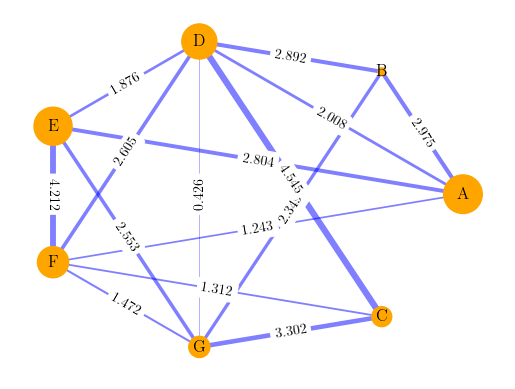

In [36]:
nodes_lst = ['A','B','C','D','E','F','G']
np.random.seed(10)
node_weights = np.random.uniform(10, 1000, len(nodes_lst))
edges_lst = [x for x in combinations(nodes_lst, 2)]
np.random.seed(10)
edge_weights = np.round([5*(x**2) for x in np.random.uniform(0, 1, len(edges_lst))],3)

G = nx.Graph()

for edge, edge_w in zip(edges_lst, edge_weights):
    if edge_w > 0.4:
        G.add_edge(edge[0], edge[1], weight=edge_w)
    else:
        pass

edge_labels = dict([((n1, n2), d['weight']) for 
    n1, n2, d in G.edges(data=True)])

pos = nx.circular_layout(G)

degree_dict = dict(G.degree(weight='weight'))

plt.figure()
plt.box(False)

nx.draw_networkx_nodes(G, pos, node_color = 'orange', 
    node_size = node_weights)
nx.draw_networkx_labels(G, pos)

for edge in G.edges(data='weight'):
    nx.draw_networkx_edges(G, pos, edgelist=[edge], width=edge[2],
    alpha=0.5, edge_color="b")

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.5)

plt.savefig('./images/1.0-weighted-graph.png', bbox_inches="tight", 
    transparent=False, edgecolor = 'white', dpi = 300)

plt.show()


Minimal spanning tree

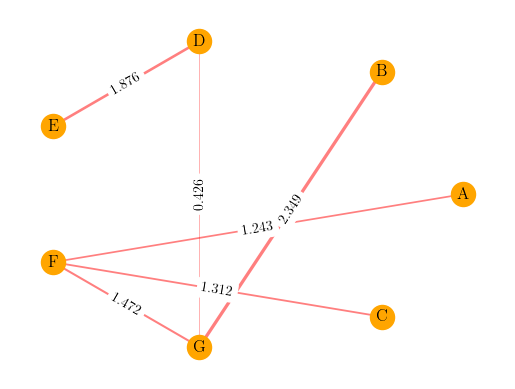

In [50]:
from networkx.algorithms import tree

G_msp = tree.minimum_spanning_tree(G)

edge_labels = dict([((n1, n2), d['weight']) for 
    n1, n2, d in G_msp.edges(data=True)])

pos = nx.circular_layout(G_msp)

degree_dict = dict(G_msp.degree(weight='weight'))

plt.figure()
plt.box(False)

nx.draw_networkx_nodes(G_msp, pos, node_color = 'orange', )
nx.draw_networkx_labels(G_msp, pos)

for edge in G_msp.edges(data='weight'):
    nx.draw_networkx_edges(G_msp, pos, edgelist=[edge], width=edge[2],
    alpha=0.5, edge_color="r")

nx.draw_networkx_edge_labels(G_msp, pos, edge_labels=edge_labels, label_pos=0.5)

plt.show()


## Figure 1. Weighted graph

{'A': array([1.00000000e+00, 1.98682151e-08]), 'B': array([-0.50000007,  0.86602542]), 'C': array([-0.49999993, -0.86602544])}


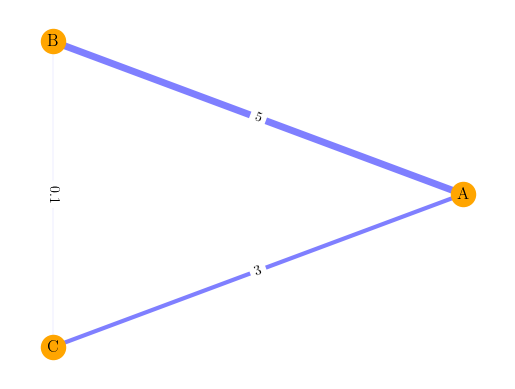

In [19]:
G = nx.Graph()

G.add_edge("A", "B", weight=5)
G.add_edge("A", "C", weight=3)
G.add_edge("B", "C", weight=0.1)

pos = nx.circular_layout(G)
print(pos)   

edge_labels = dict([((n1, n2), d['weight']) for 
    n1, n2, d in G.edges(data=True)])

degree_dict = dict(G.degree(weight='weight'))

plt.figure()
plt.box(False)

nx.draw_networkx_nodes(G, pos, node_color = 'orange')
nx.draw_networkx_labels(G, pos)

for edge in G.edges(data='weight'):
    nx.draw_networkx_edges(G, pos, edgelist=[edge], width=edge[2],
    alpha=0.5, edge_color="b")

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.5)

plt.savefig('./images/1-weighted-graph.png', bbox_inches="tight", 
    transparent=False, edgecolor = 'white', dpi = 300)
plt.show()

## KDE 2D

In [ ]:
# # В R.

# # Загружаем библиотеки

# library(readxl)
# library(ggplot2)
# library(dplyr)
# library(MASS)

# # Создаем 2 фичи, x и y. Строим КДЕ2Д, получаем векторы х, у (они являются координатами) 
# # и матрицу 25х25 (почему именно 25 не знаю). Дальше строим график, получаем картинку.

# set.seed(0)
# x = rnorm(15, 10.0, 10.0)
# y = rnorm(15, 30.0, 10.0)

# dens = kde2d(x, y)

# image(dens) 
# contour(dens, add=T)

In [9]:
# # В Питоне.

# # Создаем 2 фичи, x и y. 

# x = np.array([22.6295428, 6.7376664, 23.2979926, 22.7242932, 14.1464143, -5.3995004,  0.7143297,  7.0527955,\
#     9.9423283, 34.0465339, 17.6359346,  2.0099075, -1.4765701,  7.1053843,  7.0078488])
# y = np.array([25.88489, 32.52223, 21.08079, 34.35683, 17.62462, 27.75732, 33.77396, 31.33336,\
#     38.04190, 29.42893, 35.03608, 40.85769, 23.09046, 17.15401, 30.46726])

# # Создаем КДЕ2Д несколько более замудренно. рассчитываем позиции(xx, yy)и матрицу (f).

# xmin, xmax = np.min(x), np.max(x)
# ymin, ymax = np.min(y), np.max(y)

# # Peform the kernel density estimate
# xx, yy = np.mgrid[xmin:xmax:25j, ymin:ymax:25j]
# positions = np.vstack([xx.ravel(), yy.ravel()])
# values = np.vstack([x, y])
# kernel = gaussian_kde(values)
# f = np.reshape(kernel(positions).T, xx.shape)

# # Рисуем эту фигню, получаем сходный результат. Числа чуть играют, но некритично. 

# fig = plt.figure()
# ax = fig.gca()
# ax.set_xlim(xmin, xmax)
# ax.set_ylim(ymin, ymax)
# # Contourf plot
# cfset = ax.contourf(xx, yy, f, cmap='Blues')
# ## Or kernel density estimate plot instead of the contourf plot
# #ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
# # Contour plot
# cset = ax.contour(xx, yy, f, colors='k')
# # Label plot
# ax.clabel(cset, inline=1, fontsize=10)
# ax.set_xlabel('Y1')
# ax.set_ylabel('Y0')
# plt.show()

DescribeResult(nobs=15, minmax=(-5.3995004, 34.0465339), mean=11.211660093333334, variance=120.39637780547756, skewness=0.453785499124036, kurtosis=-0.6123274026489418)

## Figure 2. RBF SVM

In [2]:
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay

<Figure size 640x480 with 0 Axes>

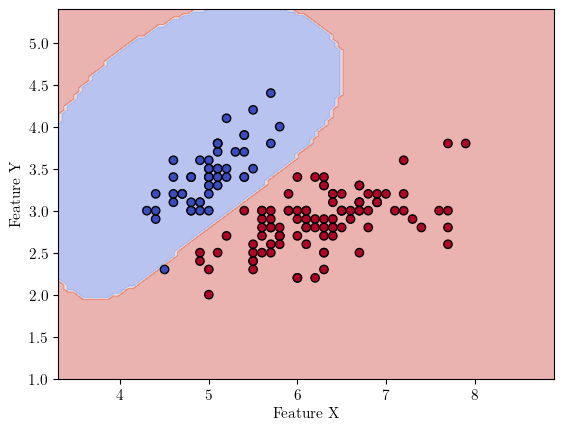

In [18]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
y[y > 1] = 1

C = 1.0

model = svm.SVC(kernel="rbf", gamma=0.7, C=C).fit(X, y)

plt.figure()
# plt.box(False)

disp = DecisionBoundaryDisplay.from_estimator(
        model,
        X,
        response_method="predict",
        alpha=0.4,
        cmap=plt.cm.coolwarm,
        xlabel="Feature X",
        ylabel="Feature Y",
    )
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.coolwarm)

plt.savefig('./images/2-rbf-boundary.png', bbox_inches="tight", 
    transparent=False, edgecolor = 'white', dpi = 300)
plt.show()